In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import SVG

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import TensorBoard
from keras.utils import to_categorical, plot_model
from keras.utils.vis_utils import model_to_dot



Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

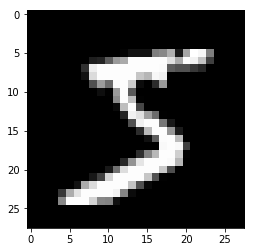

In [3]:
plt.imshow(x_train[0], cmap='gray')

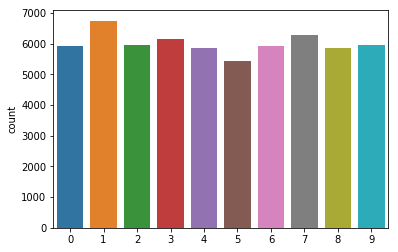

In [4]:
sns.countplot(y_train)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
tb = TensorBoard(log_dir='tensorboard_logs/ann_tb_log/sgd_' + str(round(time())), write_images=True, write_grads=True, histogram_freq=1)

In [9]:
num_classes = 10
epochs = 10
dropout_rate = 0.3

ann = Sequential()
ann.add(Flatten())
ann.add(Dense(256, activation='relu', name='hidden1'))
ann.add(Dropout(dropout_rate, name='dropout1'))
ann.add(Dense(128, activation='relu', name='hidden2'))
ann.add(Dropout(dropout_rate, name='dropout2'))
ann.add(Dense(num_classes, activation='softmax'))

ann.compile(optimizer='sgd',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

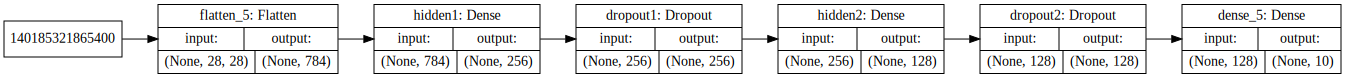

In [21]:
SVG(model_to_dot(ann, rankdir='LR', show_shapes=True).create(prog='dot', format='svg'))

In [10]:
ann.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[tb], epochs=epochs)
#ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.8004 - acc: 0.7573 - val_loss: 0.3250 - val_acc: 0.9077
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3982 - acc: 0.8826 - val_loss: 0.2463 - val_acc: 0.9302
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3160 - acc: 0.9062 - val_loss: 0.2056 - val_acc: 0.9390
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2705 - acc: 0.9200 - val_loss: 0.1771 - val_acc: 0.9472
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2409 - acc: 0.9293 - val_loss: 0.1589 - val_acc: 0.9523
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2160 - acc: 0.9366 - val_loss: 0.1443 - val_acc: 0.9576
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1971 - acc: 0.9427 - val_loss: 0.1334 - val_acc

In [ ]:
score = ann.evaluate(x_test, y_test)

In [9]:
rand = np.array([np.random.rand(28, 28)])

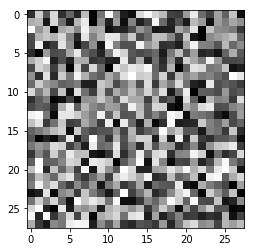

In [10]:
plt.imshow(rand[0], cmap='gray')

In [11]:
ann.predict(rand).argmax()

3